# 코로나 이전 vs 코로나 기간 동안 vs 코로나 이후의 드라마 시청률 비교
t test활용

In [169]:
import numpy as np
import pandas as pd
import datetime
from scipy import stats


## data preparation

### google colab 사용시

In [170]:
# from google.colab import files
# import io

In [171]:
#미니시리즈_메타데이터.csv파일 업로드

# uploaded = files.upload()
# mini_meta_df = pd.read_csv(io.BytesIO(uploaded['미니시리즈_메타데이터.csv']))



In [172]:
#미니시리즈 전처리1.csv파일 업로드

# uploaded = files.upload()
# mini_preprocessed_df = pd.read_csv(io.BytesIO(uploaded['미니시리즈 전처리1.csv']))


In [173]:
#드라마_시청률_데이터.csv파일 업로드

# uploaded = files.upload()
# rating_df = pd.read_csv(io.BytesIO(uploaded['드라마_시청률_데이터.csv']))


### 로컬에서 불러올시

In [174]:
file_path = r"C:\Users\sjung\Desktop\Data_Science_Lab\EDA_project\10th-EDA\Team_C\정제데이터\\"
rating_d= pd.read_csv(file_path+'전체시청률.csv')
rating_d

,작품명,방송일자,시청률,방영연도,월,일,회차,연속방송
0,(아는 건 별로 없지만) 가족입니다,2020-06-01,3.122,2020,6,1,1,1
1,(아는 건 별로 없지만) 가족입니다,2020-06-02,3.930,2020,6,2,2,1
2,(아는 건 별로 없지만) 가족입니다,2020-06-08,3.345,2020,6,8,3,1
3,(아는 건 별로 없지만) 가족입니다,2020-06-09,3.862,2020,6,9,4,1
4,(아는 건 별로 없지만) 가족입니다,2020-06-15,3.188,2020,6,15,5,1
...,...,...,...,...,...,...,...,...
8594,힙합왕 - 나스나길,2019-08-16,1.200,2019,8,16,2,2
8595,힙합왕 - 나스나길,2019-08-23,1.300,2019,8,23,3,2
8596,힙합왕 - 나스나길,2019-08-30,1.350,2019,8,30,4,2
8597,힙합왕 - 나스나길,2019-09-06,0.600,2019,9,6,5,2


## data preprocessing

In [175]:
# n부작 이상인 드라마만 추출
def drama_episode_extract(rating_d: pd.DataFrame, min_episode, max_episode)->pd.DataFrame:
    #드라마별 회차 추출
    drama_episode_count = rating_d.groupby('작품명')['시청률'].count().reset_index()
    drama_episode_count.rename(columns={'시청률':'count'}, inplace = True)
    
    # min_episode 이상 방영했고 max_episode 이하로 방영한 드라마만 추출
    bool_mask = (min_episode<=drama_episode_count['count']) & (drama_episode_count['count']<=max_episode)
    extracted_drama_df = drama_episode_count[bool_mask].reset_index(drop=True)
    
    extracted_drama_ratig = rating_d[rating_d['작품명'].isin(extracted_drama_df['작품명'])].reset_index(drop=True)
    
    return extracted_drama_ratig


min_episode = 0
max_episode = np.inf
extracted_drama_ratig = drama_episode_extract(rating_d, min_episode, max_episode)
extracted_drama_ratig


,작품명,방송일자,시청률,방영연도,월,일,회차,연속방송
0,(아는 건 별로 없지만) 가족입니다,2020-06-01,3.122,2020,6,1,1,1
1,(아는 건 별로 없지만) 가족입니다,2020-06-02,3.930,2020,6,2,2,1
2,(아는 건 별로 없지만) 가족입니다,2020-06-08,3.345,2020,6,8,3,1
3,(아는 건 별로 없지만) 가족입니다,2020-06-09,3.862,2020,6,9,4,1
4,(아는 건 별로 없지만) 가족입니다,2020-06-15,3.188,2020,6,15,5,1
...,...,...,...,...,...,...,...,...
8594,힙합왕 - 나스나길,2019-08-16,1.200,2019,8,16,2,2
8595,힙합왕 - 나스나길,2019-08-23,1.300,2019,8,23,3,2
8596,힙합왕 - 나스나길,2019-08-30,1.350,2019,8,30,4,2
8597,힙합왕 - 나스나길,2019-09-06,0.600,2019,9,6,5,2


In [176]:
# '방송일자'열의 dtype이 string으로 나오기 때문에, datetime으로 변환시키기
extracted_drama_ratig['방송일자'] = pd.to_datetime(extracted_drama_ratig['방송일자'])
print(extracted_drama_ratig.dtypes)

작품명             object
방송일자    datetime64[ns]
시청률            float64
방영연도             int64
월                int64
일                int64
회차               int64
연속방송             int64
dtype: object


In [177]:
# 결측치 제거
extracted_drama_ratig = extracted_drama_ratig.dropna(axis = 0).reset_index(drop=True)

In [178]:
extracted_drama_ratig

,작품명,방송일자,시청률,방영연도,월,일,회차,연속방송
0,(아는 건 별로 없지만) 가족입니다,2020-06-01,3.122,2020,6,1,1,1
1,(아는 건 별로 없지만) 가족입니다,2020-06-02,3.930,2020,6,2,2,1
2,(아는 건 별로 없지만) 가족입니다,2020-06-08,3.345,2020,6,8,3,1
3,(아는 건 별로 없지만) 가족입니다,2020-06-09,3.862,2020,6,9,4,1
4,(아는 건 별로 없지만) 가족입니다,2020-06-15,3.188,2020,6,15,5,1
...,...,...,...,...,...,...,...,...
8545,힙합왕 - 나스나길,2019-08-16,1.200,2019,8,16,2,2
8546,힙합왕 - 나스나길,2019-08-23,1.300,2019,8,23,3,2
8547,힙합왕 - 나스나길,2019-08-30,1.350,2019,8,30,4,2
8548,힙합왕 - 나스나길,2019-09-06,0.600,2019,9,6,5,2


In [196]:
extracted_drama_ratig.groupby('작품명')[['시청률']].agg('mean')

,시청률
작품명,
(아는 건 별로 없지만) 가족입니다,4.177688
17세의 조건,2.850000
18 어게인,2.724813
365: 운명을 거스르는 1년,4.329167
"60일, 지정생존자",4.464313
...,...
환혼 빛과 그림자,7.838500
황금 가면,14.755000
황금정원,7.411667


## test setting

코로나 시작과 끝 시점을 대한민국에서 사회적 거리두기 시행 기준으로 설정함
- 코로나 시작: 2020.03.22 (강화된 사회적 거리두기)
- 코로나 끝: 2022.04.18 (모든 사회적 거리두기 단계가 마스크 의무화를 제외하고 전면 해제)

In [179]:
covid_begin = datetime.datetime(2020,3,22,0,0,0)
covid_end = datetime.datetime(2022,4,18,0,0,0)

In [180]:
# 코로나 시작 날짜와 끝 날짜를 기준으로 데이터 프레임을 총 세 개로 나눔
# begin_date는 연, 월, 일 순서로 [2020, 3, 22]
# end_date 연, 월, 일 순서로 [2022, 4, 18]
def df_split_by_date(extracted_drama_ratig, begin_date, end_date):
    
    covid_begin = datetime.datetime(begin_date[0],begin_date[1],begin_date[2],0,0,0)
    covid_end = datetime.datetime(end_date[0],end_date[1],end_date[2],0,0,0)
    
    prior_covid_rating = extracted_drama_ratig[extracted_drama_ratig['방송일자'] < covid_begin]
    during_covid_rating = extracted_drama_ratig[(covid_begin <= extracted_drama_ratig['방송일자']) &\
                                            (extracted_drama_ratig['방송일자'] < covid_end)]
    post_covid_rating = extracted_drama_ratig[extracted_drama_ratig['방송일자'] >= covid_end]
    
    return prior_covid_rating, during_covid_rating, post_covid_rating


covid_begin = [2020,3,22]
covid_end = [2022,4,18]

prior_covid_rating, during_covid_rating, post_covid_rating =\
                    df_split_by_date(extracted_drama_ratig, covid_begin, covid_end)
print(f"Shape of [prior_covid_rating]: {prior_covid_rating.shape}")
print(f"Shape of [during_covid_rating]: {during_covid_rating.shape}")
print(f"Shape of [post_covid_rating]: {post_covid_rating.shape}")

Shape of [prior_covid_rating]: (2670, 8)
Shape of [during_covid_rating]: (3950, 8)
Shape of [post_covid_rating]: (1930, 8)


# Hypothesis testing

## 전체 데이터 (장르 구별X)

1. hypothesis test1<br>
```null hypothesis: 코로나 이전이 코로나 기간 동안 보다 시청률이 높거나 같을 것이다.```<br>
(prior_covid_rating >= during_covid_rating)<br>
```alternative hypothesis: 코로나 기간 동안이 코로나 이전보다 시청률이 높을 것이다.```<br>
(prior_covid_rating < during_covid_rating)


In [181]:
# 등분산 검정
stats.levene(prior_covid_rating['시청률'], during_covid_rating['시청률'])
# 이분산이란 걸 알 수 있다

LeveneResult(statistic=39.92530966270048, pvalue=2.810061202018888e-10)

In [182]:
# prior_covid_rating vs during_covid_rating
# null hypothesis: prior_covid_rating >= during_covid_rating
# alternative hypothesis: prior_covid_rating < during_covid_rating

t_stat, p_val = stats.ttest_ind(prior_covid_rating['시청률'],
                                during_covid_rating['시청률'],
                                equal_var = False,
                                alternative = 'less'
                                )
print(f"t-statistics: {t_stat}")
print(f"p-value: {p_val}")

t-statistics: -7.8005929341991065
p-value: 3.591878561893899e-15


2. hypothesis test2<br>
```null hypothesis: 코로나 이후가 코로나 기간 동안 보다 시청률이 높거나 같을 것이다.```<br>
(during_covid_rating <= post_covid_rating)<br>
```alternative hypothesis: 코로나 기간 동안이 코로나 이후보다 시청률이 높을 것이다.```<br>
(during_covid_rating > post_covid_rating)<br>

In [183]:
# 등분산 검정
stats.levene(during_covid_rating['시청률'], post_covid_rating['시청률'])
# 이분산이란 걸 알 수 있다

LeveneResult(statistic=53.47661768928816, pvalue=2.9664760859961156e-13)

In [184]:
# during_covid_rating vs post_covid_rating
# null hypothesis: during_covid_rating <= post_covid_rating
# alternative hypothesis: during_covid_rating > post_covid_rating

t_stat, p_val = stats.ttest_ind(during_covid_rating['시청률'],
                                post_covid_rating['시청률'],
                                equal_var = False,
                                alternative = 'greater'
                                )
print(f"t-statistics: {t_stat}")
print(f"p-value: {p_val}")

t-statistics: 8.02249680329505
p-value: 6.486796426048462e-16


In [185]:
def hypothesis_test(prior_covid_rating, during_covid_rating, post_covid_rating):
    print("코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?")
    print("<Equal variance test>")
    t_stat, p_val = stats.levene(prior_covid_rating['시청률'], during_covid_rating['시청률'])
    print(f"t-statistics: {t_stat}")
    print(f"p-value: {p_val}")
    if p_val < 0.05:
        print("Not Equal variance")
        equal_var = False
    else:
        print("Equal variance")
        equal_var = True
    
    # prior_covid_rating vs during_covid_rating
    # null hypothesis: prior_covid_rating >= during_covid_rating
    # alternative hypothesis: prior_covid_rating < during_covid_rating
    print("<t test>")
    print('null hypothesis: prior_covid_rating >= during_covid_rating')
    print('alternative hypothesis: prior_covid_rating < during_covid_rating')
    t_stat, p_val = stats.ttest_ind(prior_covid_rating['시청률'],
                                    during_covid_rating['시청률'],
                                    equal_var = equal_var,
                                    alternative = 'less')
    print(f"t-statistics: {t_stat}")
    print(f"p-value: {p_val}")
    print('*conclusion*: ', end='')
    if p_val < 0.05:
        print("reject H0")
    else:
        print("retain H0")
 
    
    print('*'*60)
    print("코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?")
    print("<Equal variance test>")
    t_stat, p_val = stats.levene(during_covid_rating['시청률'], post_covid_rating['시청률'])
    print(f"t-statistics: {t_stat}")
    print(f"p-value: {p_val}")
    if p_val < 0.05:
        print("Not Equal variance")
        equal_var = False
    else:
        print("Equal variance")
        equal_var = True

    # during_covid_rating vs post_covid_rating
    # null hypothesis: during_covid_rating <= post_covid_rating
    # alternative hypothesis: during_covid_rating > post_covid_rating
    print("<t test>")
    print('null hypothesis: during_covid_rating <= post_covid_rating')
    print('alternative hypothesis: during_covid_rating > post_covid_rating')
    t_stat, p_val = stats.ttest_ind(during_covid_rating['시청률'],
                                    post_covid_rating['시청률'],
                                    equal_var = False,
                                    alternative = 'greater')
    print(f"t-statistics: {t_stat}")
    print(f"p-value: {p_val}")
    print('*conclusion*: ', end='')
    if p_val < 0.05:
        print("reject H0")
    else:
        print("retain H0")    




print("[About whole genre]")
hypothesis_test(prior_covid_rating, during_covid_rating, post_covid_rating)

[About whole genre]
코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 39.92530966270048
p-value: 2.810061202018888e-10
Not Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: -7.8005929341991065
p-value: 3.591878561893899e-15
*conclusion*: reject H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 53.47661768928816
p-value: 2.9664760859961156e-13
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: 8.02249680329505
p-value: 6.486796426048462e-16
*conclusion*: reject H0


In [186]:
# 데이터 시각화 함수
import matplotlib.pyplot as plt
import seaborn as sns

def drawing_rating_plot(prior_covid_rating, during_covid_rating, post_covid_rating):
    x = ['before covid', 'during covid', 'after covid']
    y = [prior_covid_rating['시청률'].mean(),
         during_covid_rating['시청률'].mean(),
         post_covid_rating['시청률'].mean()]
    
    plt.figure()
    sns.set_theme(style="whitegrid")
    sns.barplot(x=x, y=y)
    plt.show()
    


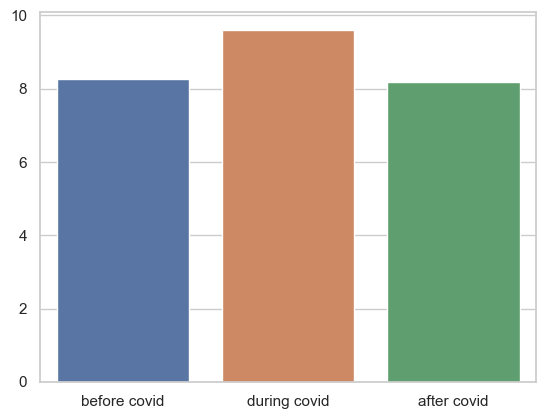

In [187]:
drawing_rating_plot(prior_covid_rating, during_covid_rating, post_covid_rating)

## 장르별로 비교

In [188]:
# 장르 데이터 읽어오기
# genre_d= pd.read_csv(file_path+'genre_one_hot_encoding.csv', encoding='cp949')
# genre_d.head()

genre_d= pd.read_csv(file_path+'genre_one_hot_encoding.csv', encoding='cp949')
genre_d.head()



,작품명,장르,드라마,로맨스,미스터리,스릴러,액션,역사,전문분야,코미디,판타지,휴먼
0,에이틴,"['웹드라마', '학원물', '로맨스']",1,1,0,0,0,0,0,0,0,1
1,최고의 치킨,['드라마'],1,0,0,0,0,0,0,0,0,0
2,왼손잡이 아내,"['복수', '멜로']",0,1,0,1,0,0,0,0,0,0
3,동네변호사 조들호 2: 죄와 벌,['법률 드라마'],1,0,0,0,0,0,1,0,0,0
4,왕이 된 남자,['사극'],0,0,0,0,0,1,0,0,0,0


In [189]:
# # dataframe 출력할 행, 열 개수 지정
# pd.set_option('display.max_columns',None) # 전체 열 출력하기
# pd.set_option('display.max_rows', 20) # 전체 행 출력하기

### 장르별 드라마 개수 파악

In [190]:
genre_list = genre_d.columns[2:].to_list()
for genre in genre_list:
    # 해당 장르의 드라마 제목들 추출
    genre_titles = genre_d[genre_d[genre]==1][['작품명']].values
    genre_titles = genre_titles.reshape(len(genre_titles))

    # 추출한 드라마들의 시청률 추출
    genre_drama_ratig = extracted_drama_ratig[extracted_drama_ratig['작품명'].isin(genre_titles)]
    print(genre)
    print(len(genre_titles))
    print()

드라마
105

로맨스
198

미스터리
72

스릴러
143

액션
83

역사
39

전문분야
49

코미디
101

판타지
50

휴먼
63



### 장르별 가설검증

In [191]:
# 장르별 시청률 데이터에 t test적용
def hypothesis_test_about_genre(extracted_drama_ratig, genre_d, genre):
    # 해당 장르의 드라마 제목들 추출
    genre_titles = genre_d[genre_d[genre]==1][['작품명']].values
    genre_titles = genre_titles.reshape(len(genre_titles))
    
    # 추출한 드라마들의 시청률 추출
    genre_drama_ratig = extracted_drama_ratig[extracted_drama_ratig['작품명'].isin(genre_titles)]
    
    covid_begin = [2020,3,22]
    covid_end = [2022,4,18]

    prior_covid_rating, during_covid_rating, post_covid_rating =\
                    df_split_by_date(genre_drama_ratig, covid_begin, covid_end)
    
    
    print(f"[Hypothesis test about {genre} genre]")
    
    #분석에 사용한 드라마 개수 파악
    print("# of dramas in this genre:", len(genre_drama_ratig.groupby('작품명')))
    
    print()
    hypothesis_test(prior_covid_rating, during_covid_rating, post_covid_rating)
    print()
    
    drawing_rating_plot(prior_covid_rating, during_covid_rating, post_covid_rating)
    print('-'*60)
    print()


[Hypothesis test about 드라마 genre]
# of dramas in this genre: 85

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 44.834400125083555
p-value: 3.3245761912847777e-11
Not Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: -5.952077890751701
p-value: 1.8240850851536639e-09
*conclusion*: reject H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 7.848674570165464
p-value: 0.005182381805345606
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: 3.119089657068779
p-value: 0.0009329774532122666
*conclusion*: reject H0



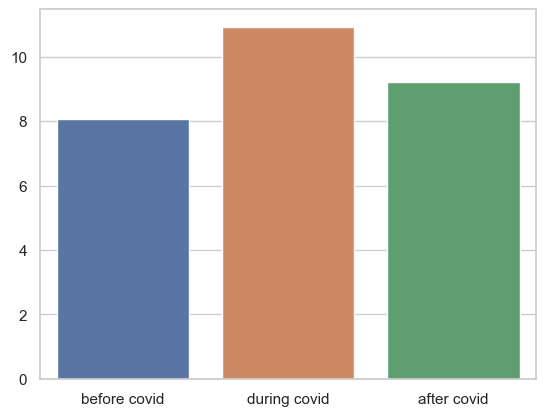

------------------------------------------------------------

[Hypothesis test about 로맨스 genre]
# of dramas in this genre: 176

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 0.14354480964439673
p-value: 0.7048049089306034
Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: 3.9242153476206614
p-value: 0.9999556642693898
*conclusion*: retain H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 115.17524823923493
p-value: 1.756938500994824e-26
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: 6.989586067768768
p-value: 1.652495812455714e-12
*conclusion*: reject H0



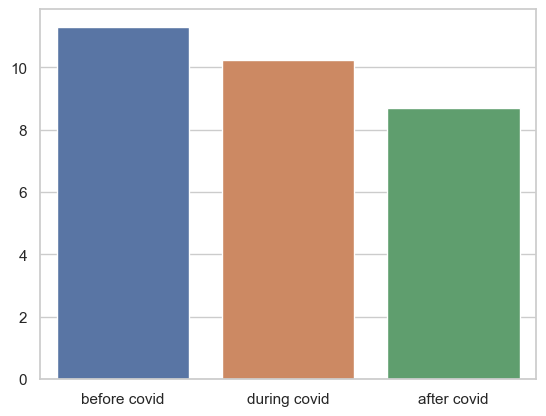

------------------------------------------------------------

[Hypothesis test about 미스터리 genre]
# of dramas in this genre: 62

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 13.42467925799142
p-value: 0.00026341282778196464
Not Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: 2.819009754930513
p-value: 0.9975299381672118
*conclusion*: retain H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 32.97234261583227
p-value: 1.3546167027222489e-08
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: -4.1499358387445575
p-value: 0.99998039437452
*conclusion*: retain H0



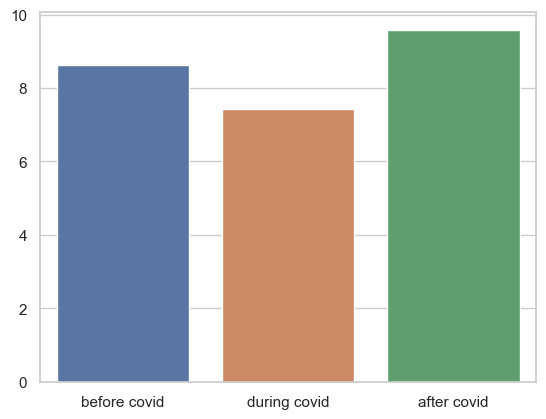

------------------------------------------------------------

[Hypothesis test about 스릴러 genre]
# of dramas in this genre: 126

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 57.53049109460288
p-value: 4.754669250457996e-14
Not Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: 7.821485311309404
p-value: 0.9999999999999959
*conclusion*: retain H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 11.463583552577767
p-value: 0.0007218902292837703
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: -0.73297575312497
p-value: 0.7681738168419547
*conclusion*: retain H0



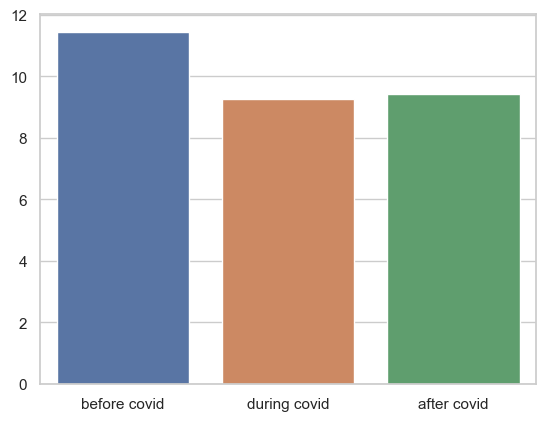

------------------------------------------------------------

[Hypothesis test about 액션 genre]
# of dramas in this genre: 74

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 1.6872436996426303
p-value: 0.19429518624132128
Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: -1.9282449444926262
p-value: 0.027068440515028783
*conclusion*: reject H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 1.3670172485253156
p-value: 0.24264673888456184
Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: -0.5587788309259427
p-value: 0.7117288707915645
*conclusion*: retain H0



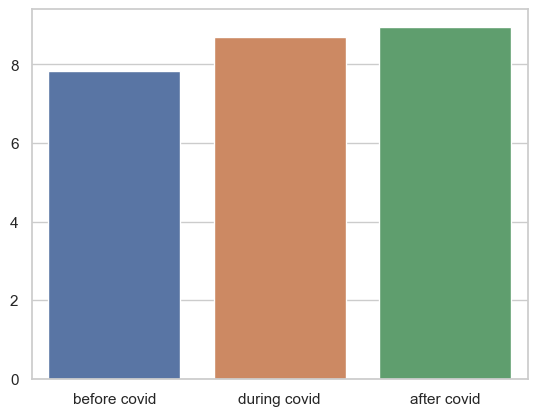

------------------------------------------------------------

[Hypothesis test about 역사 genre]
# of dramas in this genre: 38

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 21.471224044063312
p-value: 4.747515325116529e-06
Not Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: -7.953298112712796
p-value: 7.906171356499055e-15
*conclusion*: reject H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 3.0760238294803086
p-value: 0.08017873355989018
Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: 5.7194114999164505
p-value: 1.0629297028573306e-08
*conclusion*: reject H0



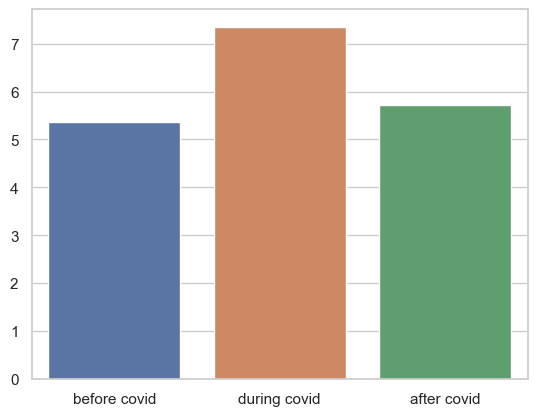

------------------------------------------------------------

[Hypothesis test about 전문분야 genre]
# of dramas in this genre: 42

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 14.97065588980737
p-value: 0.00012908242674250064
Not Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: -0.6030903610730766
p-value: 0.2734109444404572
*conclusion*: retain H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 48.98460058551396
p-value: 1.1956100097222771e-11
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: 0.7127411727934896
p-value: 0.2382262462567158
*conclusion*: retain H0



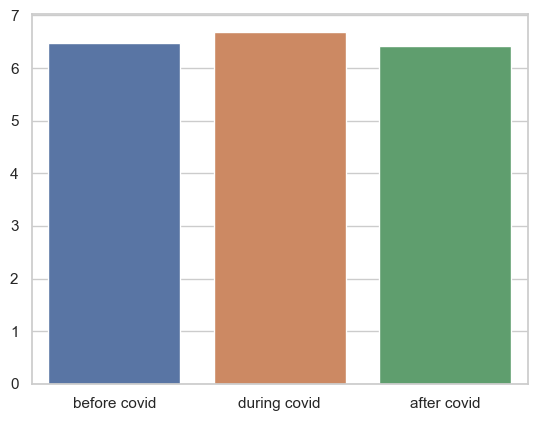

------------------------------------------------------------

[Hypothesis test about 코미디 genre]
# of dramas in this genre: 87

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 57.7854532793125
p-value: 5.5001143635970443e-14
Not Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: -8.819594685803699
p-value: 3.2770600830841698e-18
*conclusion*: reject H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 24.58635580759385
p-value: 7.993302851977599e-07
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: 6.9889355858056375
p-value: 2.6099535541499367e-12
*conclusion*: reject H0



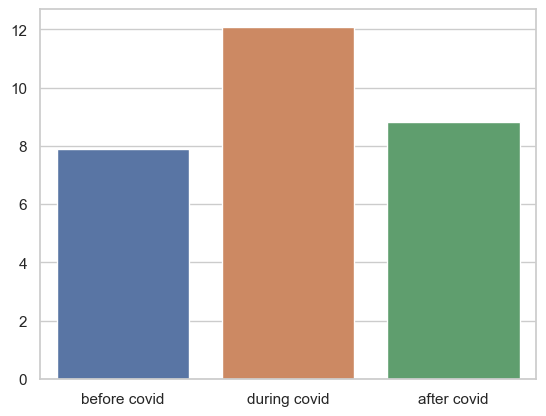

------------------------------------------------------------

[Hypothesis test about 판타지 genre]
# of dramas in this genre: 45

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 0.3160068205434017
p-value: 0.5742657779080813
Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: -3.5926176465595385
p-value: 0.0001796478917365302
*conclusion*: reject H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 7.416681697521569
p-value: 0.006708516834828142
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: 0.41629819487819664
p-value: 0.3387236235147585
*conclusion*: retain H0



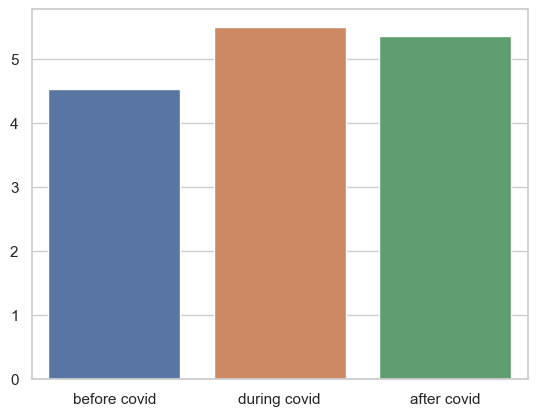

------------------------------------------------------------

[Hypothesis test about 휴먼 genre]
# of dramas in this genre: 49

코로나 이전 vs 코로나 기간 동안의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 11.15644265062673
p-value: 0.0009002422113837887
Not Equal variance
<t test>
null hypothesis: prior_covid_rating >= during_covid_rating
alternative hypothesis: prior_covid_rating < during_covid_rating
t-statistics: -3.632671425604549
p-value: 0.00015480159569262488
*conclusion*: reject H0
************************************************************
코로나 기간 동안 vs 코로나 이후의 시청률에 유의미한 차이가 있는가?
<Equal variance test>
t-statistics: 15.825841466129273
p-value: 7.883006084992825e-05
Not Equal variance
<t test>
null hypothesis: during_covid_rating <= post_covid_rating
alternative hypothesis: during_covid_rating > post_covid_rating
t-statistics: 4.628850574228693
p-value: 2.36024759231682e-06
*conclusion*: reject H0



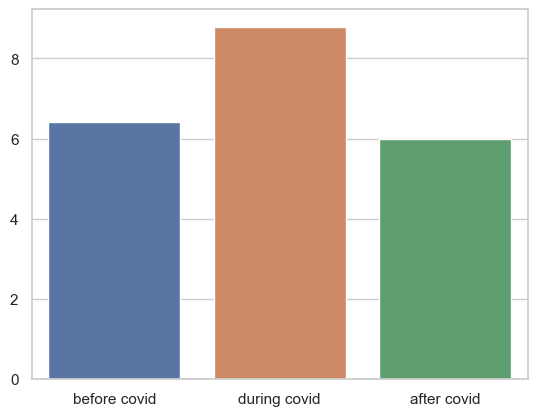

------------------------------------------------------------



In [192]:
genre_list = genre_d.columns[2:].to_list()
for genre in genre_list:
    hypothesis_test_about_genre(extracted_drama_ratig, genre_d, genre)